In [1]:
##imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
## mounting on gdrive/comment for jupyter
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importação dos Dados

In [3]:
df_train = pd.read_csv('drive/MyDrive/Colab Notebooks/treino_309.csv')
df_test = pd.read_csv('drive/MyDrive/Colab Notebooks/BASE-PREPROCESSED(TESTE).gz', compression='gzip', sep='\t')

In [ ]:
def create_split(df, target, drop_end=1):
    df = df.dropna()
    if 'PROPHET_NORM_FEATURES' in df.columns.values:
        df.drop(['PROPHET_NORM_FEATURES'], inplace=True, axis=1)
    if 'NEURO_LABEL' in df.columns.values:
        df.drop(['NEURO_LABEL'], inplace=True, axis=1)
    if 'PROPHET_LABEL' in df.columns.values:
        df.drop(['PROPHET_LABEL'], inplace=True, axis=1)
    return df[df.columns[:len(df.columns)-drop_end]].to_numpy(), df[[target]].to_numpy().reshape(-1)

In [4]:
df = df_train.drop(['PROPHET_NORM_FEATURES', 'NEURO_LABEL', 'Unnamed: 0'], axis = 1).append(df_test.drop(['PROPHET_NORM_FEATURES', 'NEURO_LABEL'], axis = 1))

In [5]:
X = df[df.columns].drop(['ALVO'], axis=1)

In [6]:
X.drop('PROPHET_LABEL', axis=1, inplace=True)

In [7]:
y = df.ALVO

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor().fit(X, y)
tree.feature_importances_

array([1.07170694e-02, 1.89633593e-02, 3.72218747e-02, 1.42269433e-02,
       5.13170131e-04, 5.07875301e-04, 5.93215745e-04, 1.50210832e-03,
       9.18817387e-04, 6.61567678e-03, 1.61421649e-02, 5.00771419e-04,
       9.54590354e-04, 2.38246188e-03, 8.67583791e-04, 8.21033087e-04,
       1.51011128e-03, 1.35796878e-03, 0.00000000e+00, 2.23185823e-03,
       6.56765104e-04, 2.19572648e-03, 8.80524963e-04, 2.14580346e-03,
       0.00000000e+00, 8.51632457e-04, 1.29874351e-03, 5.21995816e-04,
       1.22630370e-03, 1.74424415e-03, 1.34610740e-03, 8.41728875e-04,
       4.65283431e-04, 0.00000000e+00, 1.16491065e-03, 7.82242977e-04,
       0.00000000e+00, 6.93244918e-04, 6.32103989e-04, 0.00000000e+00,
       1.22367602e-03, 4.63645454e-04, 2.42286360e-03, 7.17339938e-04,
       1.41508014e-03, 1.53704015e-03, 1.63589490e-03, 8.61291416e-04,
       0.00000000e+00, 7.55209720e-04, 1.47692977e-03, 1.21185771e-03,
       7.27896576e-04, 1.21274131e-03, 1.30028256e-03, 1.16927915e-03,
      

In [9]:
feat_imp = tree.feature_importances_
cols_to_use = X[X.columns.values[np.where(feat_imp>5e-3)]].columns.values

In [10]:
cols_to_use = np.append(cols_to_use, df_test.columns[0])

In [11]:
df_train = df_train[cols_to_use]
df_test = df_test[cols_to_use]

In [12]:
X_train = df_train[df_train.drop(['ALVO'], axis=1).columns.values]
y_train = df_train.ALVO


In [13]:
X_test = df_test[df_test.drop(['ALVO'], axis=1).columns.values]
y_test = df_test.ALVO

# Primeiro Modelo: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
forest = RandomForestClassifier(max_features=6, n_estimators=100)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=6,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [ ]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

In [ ]:
metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

In [ ]:
metrics_df

,Métrica,Valor
Accuracy,Accuracy,0.981480
Recall,Recall,0.978689
Precision,Precision,0.999705
F1,F1,0.989085
ROC-AUC,ROC-AUC,0.988475


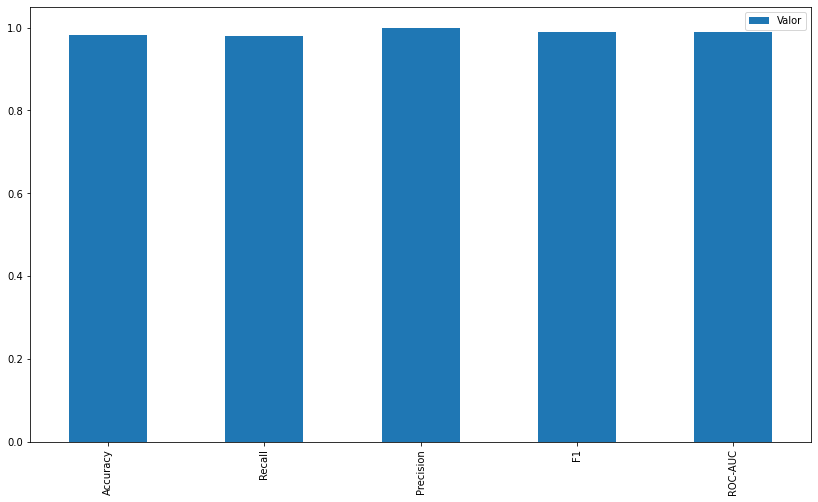

In [ ]:
metrics_df.plot(kind='bar',figsize=(14,8))

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(y_pred, y_test)

Ks_2sampResult(statistic=0.14258128139860285, pvalue=0.0)

In [ ]:
import pickle
f = open('RandomForest', 'wb')
pickle.dump(forest, f)

# Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
gbrt = GradientBoostingClassifier(max_depth = 25)

In [16]:
gbrt.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
y_pred = gbrt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

In [ ]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))

In [ ]:
import pickle
f = open('./models/GradientBoosting', 'wb')
pickle.dump(gbrt, f)

# Ensemble MLP

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier

In [18]:
baggingClassifier = BaggingClassifier(
    base_estimator = MLPClassifier(hidden_layer_sizes = (16)),
    max_samples = 0.75,
    max_features = 0.75,
    n_estimators = 5
)

In [19]:
baggingClassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                               batch_size='auto', beta_1=0.9,
                                               beta_2=0.999,
                                               early_stopping=False,
                                               epsilon=1e-08,
                                               hidden_layer_sizes=16,
                                               learning_rate='constant',
                                               learning_rate_init=0.001,
                                               max_fun=15000, max_iter=200,
                                               momentum=0.9,
                                               n_iter_no_change=10,
                                               nesterovs_momentum=True,
                                               power_t=0.5, random_state=None,
                                               shuffle=True, solver='adam',
  

In [20]:
y_pred = baggingClassifier.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_pred)

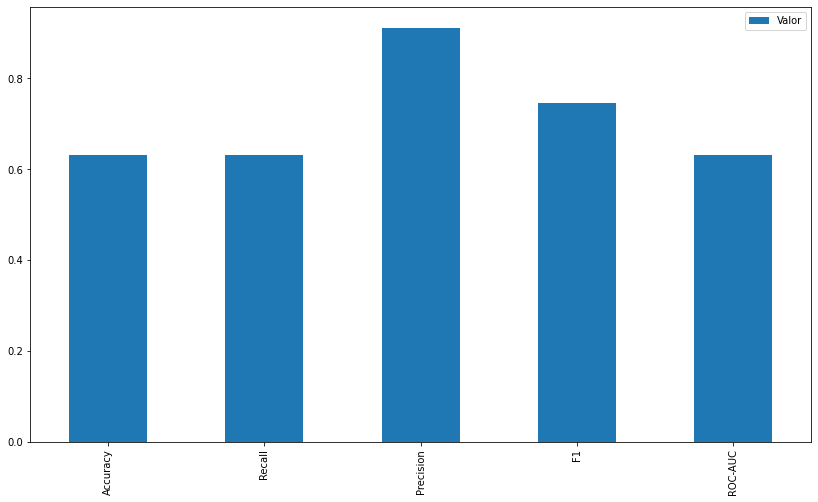

In [22]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))

In [23]:
from scipy.stats import ks_2samp

In [24]:
ks_2samp(y_pred, y_test)

Ks_2sampResult(statistic=0.2630383263028, pvalue=0.0)

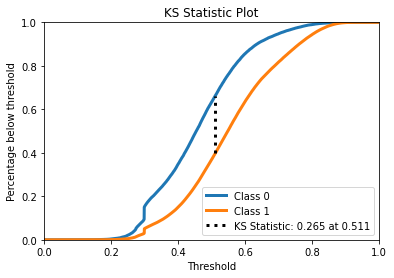

In [30]:
!pip install scikit-plot
from scikitplot.metrics import plot_ks_statistic
plot_ks_statistic(y_test,baggingClassifier.predict_proba(X_test))

In [25]:
import pickle
f = open('BaggingClassifierMLP', 'wb')
pickle.dump(baggingClassifier, f)

# Ensemble de Modelos por Max Voting

In [ ]:
#model imports
import pickle

In [ ]:
rf = pickle.load(open('drive/MyDrive/Colab Notebooks/RandomForest', 'rb'))
gbrt = pickle.load(open('drive/MyDrive/Colab Notebooks/GradientBoosting', 'rb'))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.1 when using version 0.22.2.post1. This might lead to breakin

In [ ]:
pred1=rf.predict(X_test)
pred2=gbrt.predict(X_test)

In [ ]:
from scipy import stats
final_pred = []
for i in range(0,len(X_test)):
    final_pred.append(stats.mode([pred1[i], pred2[i]])[0][0])

In [ ]:
accuracy = accuracy_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
roc = roc_auc_score(y_test, final_pred)

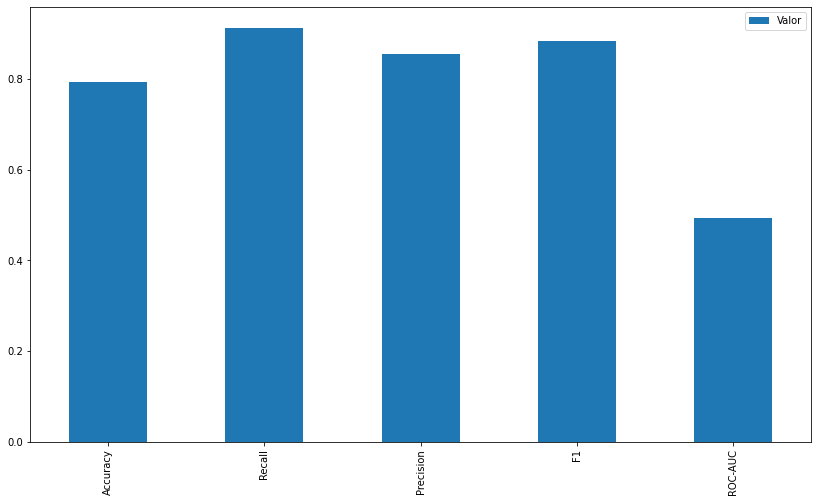

In [ ]:
metrics_dict = {'Accuracy': accuracy, 'Recall': recall, 'Precision': precision, 'F1': f1, 'ROC-AUC': roc}

metrics_df = pd.DataFrame(metrics_dict.items(), index = metrics_dict.keys(), columns=['Métrica', 'Valor'])

metrics_df.plot(kind='bar',figsize=(14,8))